<a href="https://colab.research.google.com/github/dmeadows95/CS4783_HW1/blob/main/CS4783_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1.2.a)


Text(0, 0.5, 'y - Output')

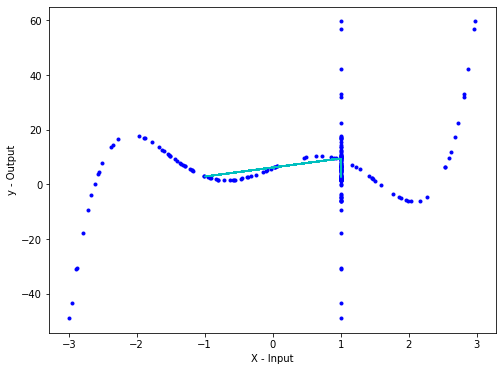

In [22]:
# Damon Meadows
# CS 4783
# Last modified: 9-16-22
# Question 1

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load training data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

# add column of 1s in training data for bias term
x_train = np.append(x_train, np.ones((100,1)), axis = 1)

# reshape y training data to accomodate bias term in x
y_train = y_train.reshape(100,1)

# load testing data
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

# add column of 1s in testing data for bias term
x_test = np.append(x_test, np.ones((100,1)), axis = 1)

# use normal equations to derive value of theta
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

y_prediction = x_test.dot(theta)


print("Question 1.1)")
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_prediction, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - Output')

Question 1.2.a)
  The relationship is not linear

Question 1.2.b) 
  Because the relationship is non linear, feature engineering would be helpful to more closely match the data

In [80]:
 # Damon Meadows
# CS 4783
# Last modified: 9-16-22
# Question 2 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import genfromtxt

# read information from file
input = genfromtxt('Assignment1_Q2_Data.csv', delimiter=',', skip_header = 1)

# truncate first and last column, first is just id and last is output
data = input[:,1:-1]
# use last column of input to create output array
house_price = input[:,-1]
# truncate array for each individual feature
local_price = input[:,1]
bathrooms = input[:,2]
land_area = input[:,3]
living_area = input[:,4]
garages = input[:,5]
rooms = input[:,6]
bedrooms = input[:,7]
age = input[:,8]
construction = input[:,9]
architecture = input[:,10]
fireplace = input[:,11]

# function to use normal equations to obtain theta
def get_theta (x_data, y_data):

  num_examples = x_data.shape[0]

# add column of 1s in training data for bias term
 # x_data = np.append(x_data, np.ones((num_examples,1)), axis = 1)

# reshape y training data to accomodate bias term in x
  y_data = y_data.reshape(num_examples,1)

# use normal equations to derive value of theta
  theta = np.dot(np.linalg.inv(np.dot(x_data.T, x_data)), np.dot(x_data.T, y_data))

  return theta

# function to use theta to make prediction
def get_prediction (x_data, y_data):
    
    m = x_data.shape[0]
    x_data = np.append(x_data, np.ones((m,1)), axis=1)
    theta = get_theta(x_data, y_data)
    y_prediction = np.dot(x_data, theta)

    return y_prediction

predictions = []

def get_error(x_data, y_data):
# initialize i and error for use in loop
  i = 0
  error = 0
# obtain array of predictions
  predictions = get_prediction(x_data, y_data)

# while loop to total up square error for each prediction
  while i < 28:
    error += ((house_price[i] - predictions[i])**2) / 28
    i += 1

  return error

# compute average square error
print("average square error:",get_error(data, house_price))

# TODO: resolve compilation error
# feature specific square error computations:

#print("local price square error:",get_error(local_price, house_price))
#print("bathrooms square error:",get_error(bathrooms, house_price))
#print("land area square error:",get_error(land_area, house_price))
#print("living area square error:",get_error(living_area, house_price))
#print("garages square error:",get_error(garages, house_price))
#print("rooms square error:",get_error(rooms, house_price))
#print("bedrooms square error:",get_error(bedrooms, house_price))
#print("age square error:",get_error(age, house_price))
#print("construction square error:",get_error(construction, house_price))
#print("architecture square error:",get_error(architecture, house_price))
#print("fireplace square error:",get_error(fireplace, house_price))

average square error: [9.3168112]


Question 2.1) The average square error for my simple regression model is ~9.32

Question 2.2) My strategy for determining which feature had the greatest effect on the final value was to isolate each one and run error calculations. Unfortunately, I am getting an axis out of bounds error for these isolated calculations that I have been unable to resolve so I cannot determine conclusively which factor most contributes to the average square error.

Question 2.3) My strategy for determining which feature had the least effect on the final value was to isolate each one and run error calculations. Unfortunately, I am getting an axis out of bounds error for these isolated calculations that I have been unable to resolve so I cannot determine conclusively which factor least contributes to the average square error.

In [96]:
from pyparsing import java_style_comment
# Damon Meadows
# CS 4783
# Last modified: 9-16-22
# Question 3

# load training data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

# load testing data
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")


def weight_matrix(point, training_data, tau): 
    
  # tau is our bandwidth
  # training_data is our Training data.
  # point is the x where we want to make the prediction.
    
  # number of training examples
    num_examples = training_data.shape[0] 
    
  # initialize W as an identity matrix.
    w = np.mat(np.eye(num_examples)) 
    
  # calculate weights for all training examples [x(i)'s].
    for i in range(num_examples): 
        xi = training_data[i] 
        j = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/j) 
        
    return w


# function to obtain theta and make prediction
def get_prediction (input_data, output_data, point):

# number training examples
  num_examples = input_data.shape[0]

# add column of ones in input_data to add the bias term.
  data = np.append(input_data, np.ones(num_examples).reshape(num_examples,1), axis=1)

# point where we want to make locally weighted prediction
  predict_point = np.array([point, 1])

# calculate weight matrix for predict_point
  w = weight_matrix(predict_point, input_data, .08)


# calculate theta
  theta = np.linalg.inv(data.T*(w * data)) * (data.T * w * output_data)

  y_prediction = input_data.dot(predict_point,theta)

  return y_prediction

# initialize predictions array
predictions = []

# append specific predictions
for point in x_test:
  this_prediction = get_prediction(x_train, y_train, point)
  predictions.append[this_prediction]



(2, 2)
(2, 100)
(100, 100)
(100,)
(2, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: ignored

Question 3.1) basis functions are not necessary for a locally weighted approach, the local weightings accomodate non-linearities in the data

Question 3.2) the difference between this and question 1 is that this approach applies a weight matrix that causes predictions at any given point to be more heavily influenced by points closer to them than those farther from them. The approach in question 1 determined a simple line where each data point evenly affected all others.